In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pumpkins = pd.read_csv('../02/US-pumpkins.csv')

In [3]:
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
new_columns = ['Color', 'Origin', 'Item Size', 'Variety', 'City Name', 'Package']
new_pumpkins = pumpkins[new_columns]

In [6]:
new_pumpkins.isnull().sum()

Color        616
Origin         3
Item Size    279
Variety        5
City Name      0
Package        0
dtype: int64

In [7]:
new_pumpkins.count()

Color        1141
Origin       1754
Item Size    1478
Variety      1752
City Name    1757
Package      1757
dtype: int64

In [8]:
new_pumpkins.dropna(inplace=True)

/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
new_pumpkins.isnull().sum()

Color        0
Origin       0
Item Size    0
Variety      0
City Name    0
Package      0
dtype: int64

In [10]:
new_pumpkins.count()

Color        991
Origin       991
Item Size    991
Variety      991
City Name    991
Package      991
dtype: int64

In [11]:
new_pumpkins.describe()

,Color,Origin,Item Size,Variety,City Name,Package
count,991,991,991,991,991,991
unique,2,18,7,9,13,7
top,ORANGE,MASSACHUSETTS,sml,HOWDEN TYPE,BOSTON,36 inch bins
freq,835,194,273,531,348,520


In [12]:
new_pumpkins.head()

,Color,Origin,Item Size,Variety,City Name,Package
2,ORANGE,DELAWARE,med,HOWDEN TYPE,BALTIMORE,24 inch bins
3,ORANGE,VIRGINIA,med,HOWDEN TYPE,BALTIMORE,24 inch bins
4,ORANGE,MARYLAND,lge,HOWDEN TYPE,BALTIMORE,24 inch bins
5,ORANGE,MARYLAND,lge,HOWDEN TYPE,BALTIMORE,24 inch bins
6,ORANGE,MARYLAND,med,HOWDEN TYPE,BALTIMORE,36 inch bins


In [13]:
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [14]:
new_pumpkins.head()

,Color,Origin,Item Size,Variety,City Name,Package
2,0,3,3,4,1,3
3,0,17,3,4,1,3
4,0,5,2,4,1,3
5,0,5,2,4,1,3
6,0,5,3,4,1,4


In [15]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Color      991 non-null    int64
 1   Origin     991 non-null    int64
 2   Item Size  991 non-null    int64
 3   Variety    991 non-null    int64
 4   City Name  991 non-null    int64
 5   Package    991 non-null    int64
dtypes: int64(6)
memory usage: 54.2 KB


In [16]:
import seaborn as sns

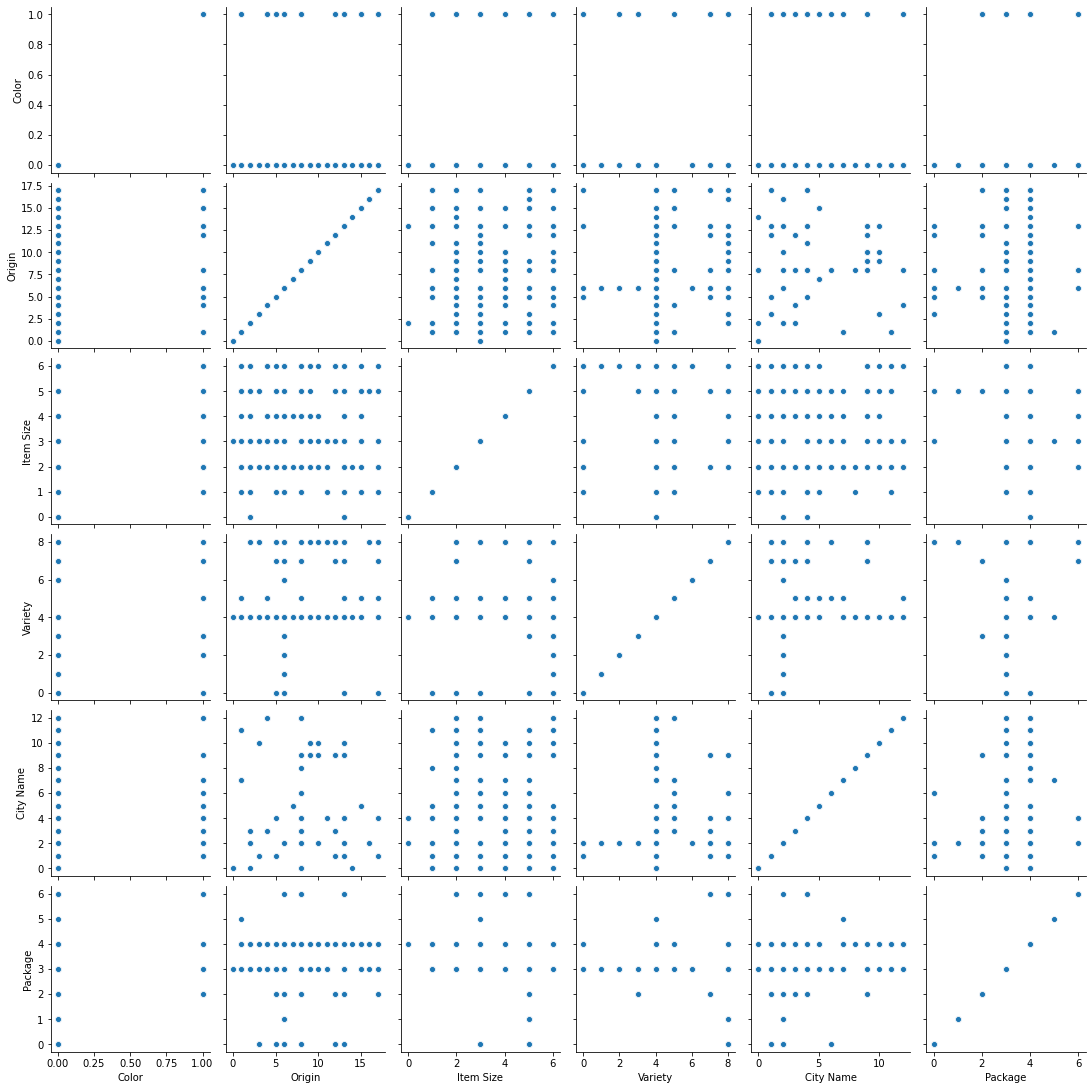

In [17]:
g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)
plt.show()

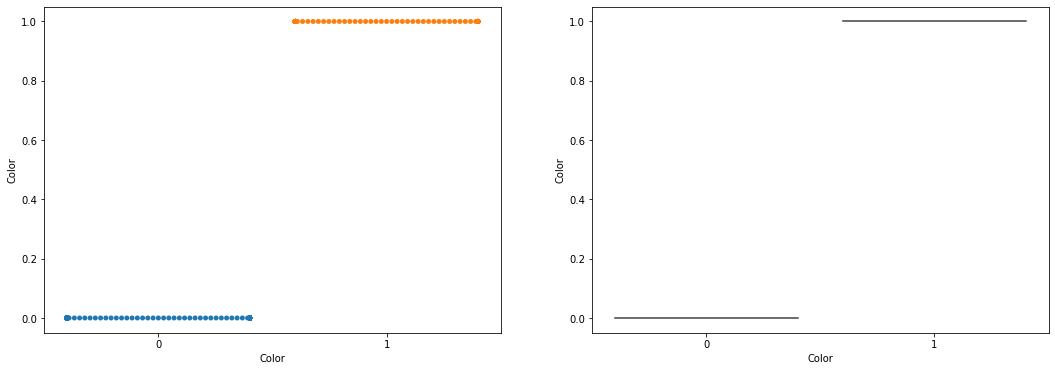

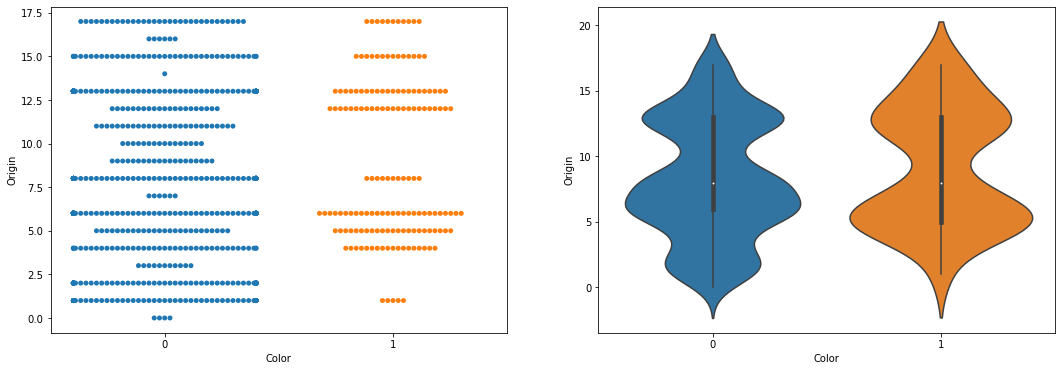

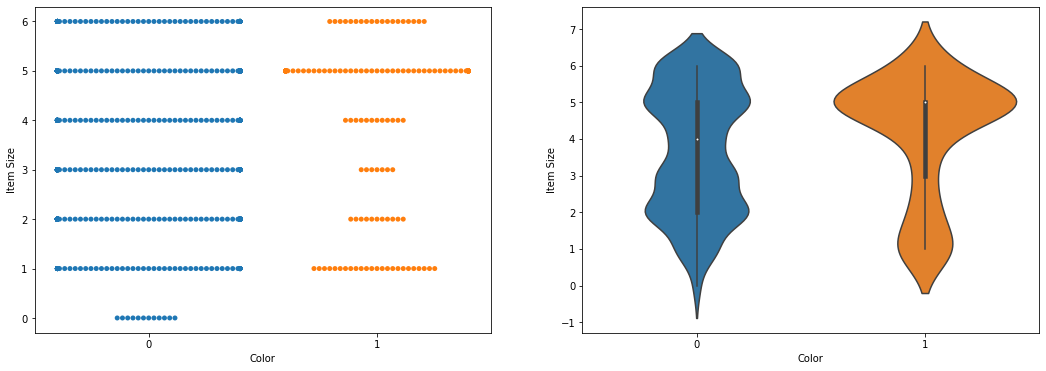

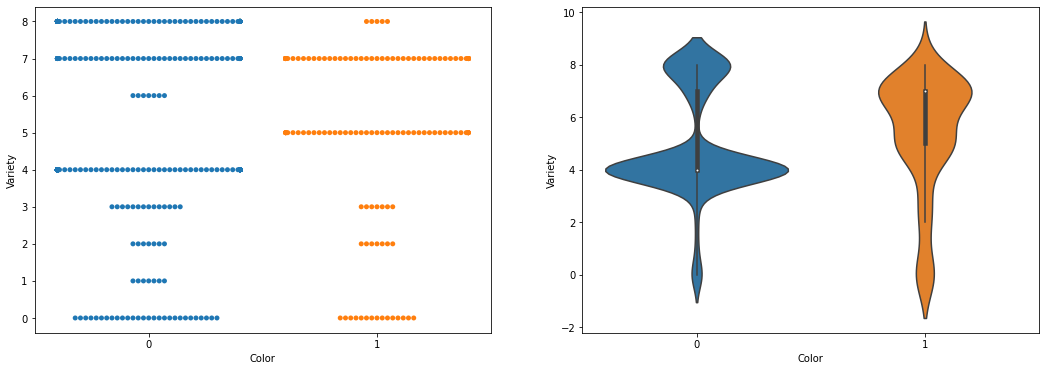

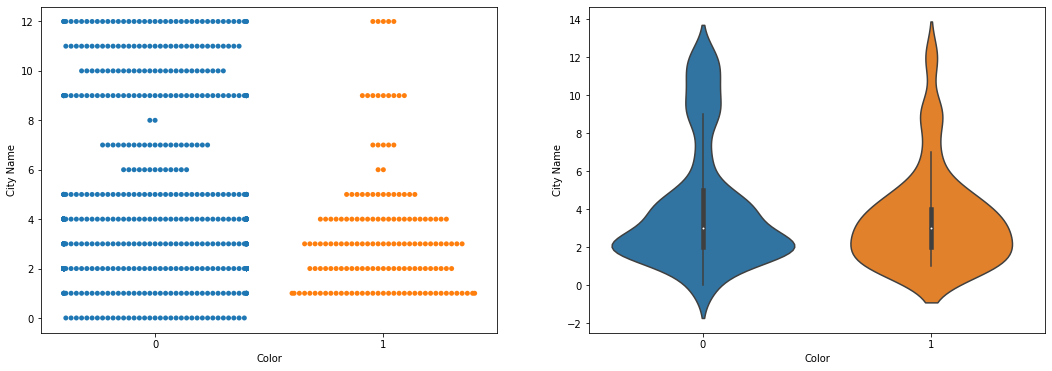

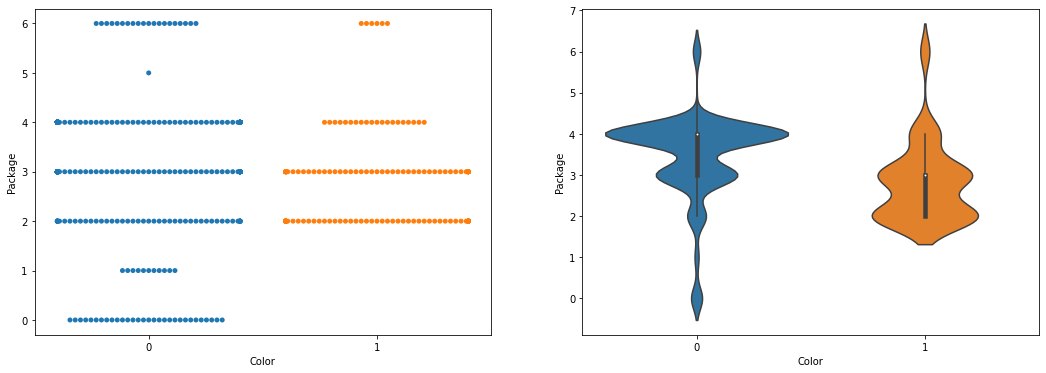

In [21]:
for col in new_columns:
    fig, ax = plt.subplots(1, 2, figsize=(18,6))
    sns.swarmplot(x='Color', y=col, data=new_pumpkins, ax=ax[0])
    sns.violinplot(x='Color', y=col, data=new_pumpkins, ax=ax[1])
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199



In [28]:
accuracy_score(y_test, pred)

0.8140703517587939

In [29]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, pred)

array([[162,   4],
       [ 33,   0]])

In [32]:
confusion_matrix(y_test, y_test)

array([[166,   0],
       [  0,  33]])

In [33]:
confusion_matrix(y_train, model.predict(X_train))

array([[654,  15],
       [123,   0]])

In [34]:
confusion_matrix(y_train, y_train)

array([[669,   0],
       [  0, 123]])

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

In [36]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [38]:
model.predict_proba(X_test).shape

(199, 2)

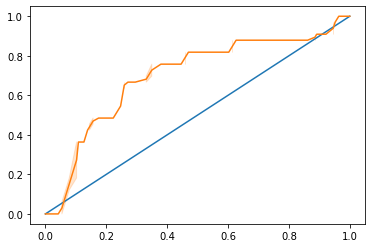

In [40]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot(np.linspace(0,1,50), np.linspace(0,1,50))
sns.lineplot(fpr, tpr)
plt.show()

In [41]:
roc_auc_score(y_test,y_scores[:,1])

0.6976998904709748